# 🎬 MovieLens-Based Recommender System with Visualizations
Using MovieLens 100K dataset for collaborative filtering and visualization.

In [1]:

# Uncomment below if running in Colab
# !pip install seaborn scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


## Step 1: Load MovieLens 100K Dataset

In [3]:

url = "https://files.grouplens.org/datasets/movielens/ml-100k/u.data"
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=column_names)
df.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## Step 2: Create User-Item Matrix

In [9]:

user_item_matrix = df.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
user_item_matrix.iloc[:5, :5]


item_id,1,2,3,4,5
user_id,,,,,
1,5.0,3.0,4.0,3.0,3.0
2,4.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0


## Step 3: Visualize Interaction Heatmap

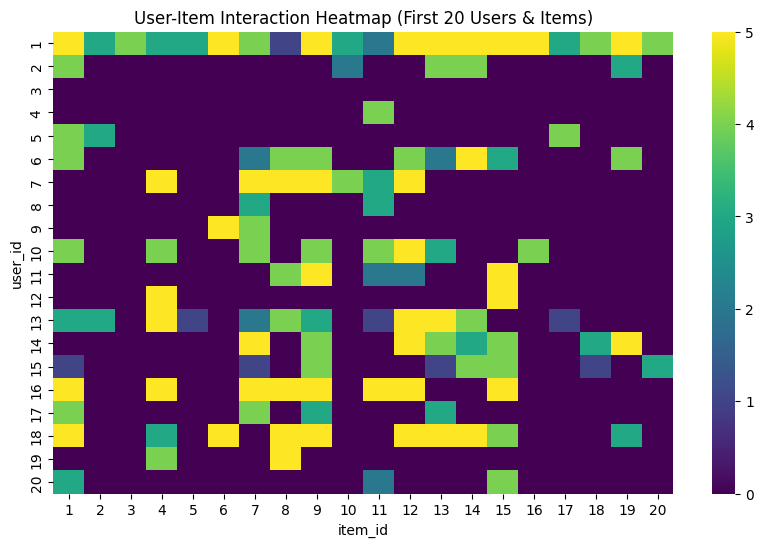

In [5]:

plt.figure(figsize=(10,6))
sns.heatmap(user_item_matrix.iloc[:20, :20], cmap='viridis')
plt.title("User-Item Interaction Heatmap (First 20 Users & Items)")
plt.show()


## Step 4: Compute User Similarity (Cosine)

In [6]:

user_similarity = cosine_similarity(user_item_matrix)
user_sim_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_sim_df.iloc[:5, :5]


user_id,1,2,3,4,5
user_id,,,,,
1,1.000000,0.166931,0.047460,0.064358,0.378475
2,0.166931,1.000000,0.110591,0.178121,0.072979
3,0.047460,0.110591,1.000000,0.344151,0.021245
4,0.064358,0.178121,0.344151,1.000000,0.031804
5,0.378475,0.072979,0.021245,0.031804,1.000000


## Step 5: Predict Ratings for Unrated Items

In [7]:

def predict_ratings(user_id, top_n=5):
    user_ratings = user_item_matrix.loc[user_id]
    unrated_items = user_ratings[user_ratings == 0].index
    sim_scores = user_sim_df[user_id]

    predictions = {}
    for item in unrated_items:
        item_ratings = user_item_matrix[item]
        weighted_sum = np.dot(sim_scores, item_ratings)
        sim_total = np.sum(sim_scores[item_ratings > 0])
        if sim_total > 0:
            predictions[item] = weighted_sum / sim_total
    sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)
    return sorted_predictions[:top_n]

# Recommend top movies for user 10
top_recommendations = predict_ratings(user_id=10)
top_recommendations


[(814, np.float64(5.000000000000001)),
 (1500, np.float64(5.000000000000001)),
 (1122, np.float64(5.0)),
 (1189, np.float64(5.0)),
 (1201, np.float64(5.0))]

## Step 6: Visualize Top Recommendations

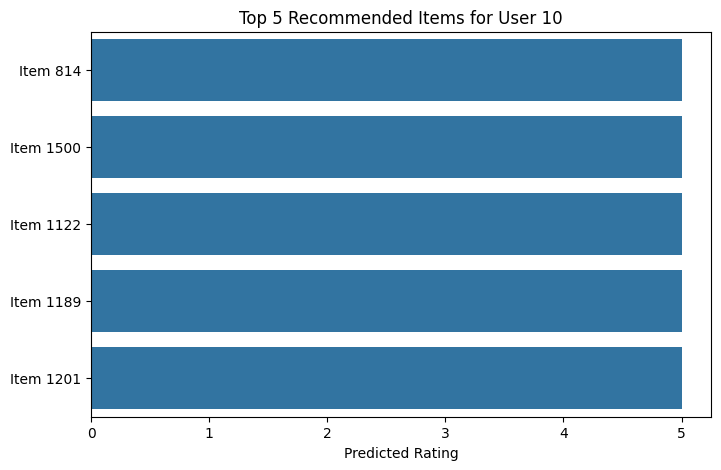

In [8]:

top_items = [x[0] for x in top_recommendations]
scores = [x[1] for x in top_recommendations]

plt.figure(figsize=(8,5))
sns.barplot(x=scores, y=[f"Item {i}" for i in top_items])
plt.xlabel("Predicted Rating")
plt.title("Top 5 Recommended Items for User 10")
plt.show()
